In [1]:
import pandas as pd 


In [2]:
dataset = pd.read_csv("insurance_pre.csv")
dataset 

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset = pd.get_dummies(dataset, dtype=int)

In [4]:
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0
1334,18,31.920,0,2205.98080,1,0,1,0
1335,18,36.850,0,1629.83350,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0


In [5]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes'],
      dtype='object')

In [6]:
independent = dataset[['age', 'bmi', 'children','sex_female', 'sex_male','smoker_no', 'smoker_yes']]
independent

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,1,0,0,1
1,18,33.770,1,0,1,1,0
2,28,33.000,3,0,1,1,0
3,33,22.705,0,0,1,1,0
4,32,28.880,0,0,1,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0
1334,18,31.920,0,1,0,1,0
1335,18,36.850,0,1,0,1,0
1336,21,25.800,0,1,0,1,0


In [7]:
dependent = dataset[['charges']]

In [8]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(independent,dependent,test_size = 0.30, random_state = 0)

In [180]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='poisson',max_features = "log2", splitter='random')
regressor = regressor.fit(X_train,y_train)

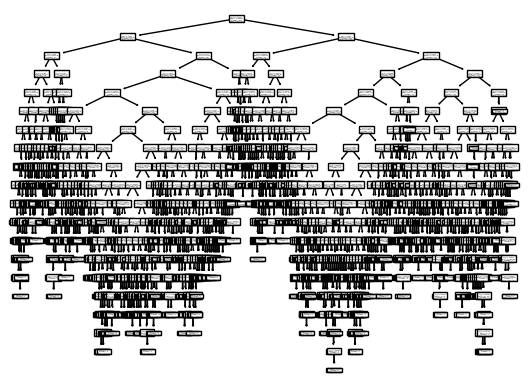

In [181]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [182]:
y_pred = regressor.predict(X_test)

In [183]:
y_pred

array([10065.413   ,  8930.93455 , 44202.6536  , 13143.86485 ,
       13204.28565 , 21984.47061 ,  2196.4732  , 10381.4787  ,
        7418.522   ,  5253.524   ,  5693.4305  ,  9715.841   ,
        9910.35985 ,  4992.3764  , 16138.76205 , 10381.4787  ,
       11534.87265 , 14358.36437 ,  6393.60345 , 17352.6803  ,
       22218.1149  , 36910.60803 , 10704.47    , 22331.5668  ,
        1532.4697  ,  3292.52985 ,  2585.269   , 15828.82173 ,
        3353.284   , 32108.66282 , 15828.82173 , 47269.854   ,
       12981.3457  , 20781.48892 , 20167.33603 ,  3554.203   ,
        7152.6714  , 38282.7495  , 39725.51805 ,  1880.07    ,
        2527.81865 ,  2866.091   , 37829.7242  , 42760.5022  ,
       38792.6856  ,  3579.8287  , 10381.4787  ,  6389.37785 ,
        4719.52405 , 26236.57997 ,  2020.5523  ,  4234.927   ,
       26109.32905 , 46661.4424  , 11856.4115  , 12404.8791  ,
       12404.8791  ,  8442.667   ,  6593.5083  , 30166.61817 ,
        1252.407   , 28868.6639  , 15161.5344  , 25333.

In [184]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)
r_score

0.6194677992705753

In [179]:
import pickle 
filename = "finalized_model_DT.sav"
pickle.dump(regressor,open(filename,'wb'))